# Fundamentals Company Geographic Sales Breakdown

LSEG's Reuters Fundamentals has over 35 years of experience in collecting and delivering the most timely and highest quality fundamentals data in the industry, including an unmatched depth and breadth of primary financial statements, footnote items, segment data, industry specific operating metrics, financial ratios, and much more. 

Reuters Fundamentals standardized and As Reported financial statement data – both interim and annual – along with per-share data, calculated financial ratios, company profile information, security data, Officers & Directors and market content for over 90,000 issuers. 


## Business & Geographic Segments

Reuters Fundamentals also contains information for each segment reported by a company on an annual and interim basis Global coverage. This information which let you drive down your interested company sale revenue of each region.

This Jupyter Notebook uses [LSEG Data Libary for Python](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python) (aka Data Library version 2) to consume company geographic sale data from Reuters Fundamentals via Workspace platform, then breakdown and display each region revenue in readable graph format.

## Introduction to the Data Library for Python

The [Data Library for Python](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python) provides a set of ease-of-use interfaces offering coders uniform access to the breadth and depth of financial data and services available on the Workspace, RDP, and Real-Time Platforms. The API is designed to provide consistent access through multiple access channels and target both Professional Developers and Financial Coders. Developers can choose to access content from the desktop, through their deployed streaming services, or directly to the cloud. With the Data Library, the same Python code can be used to retrieve data regardless of which access point you choose to connect to the platform.


![Figure-1](images/datalib_image.png "Data Library Diagram") 

The Data Library are available in the following programming languages:

- [Python](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python)
- [.NET](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-net)
- [TypeScript](https://developers.lseg.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-typescript)

For more deep detail regarding the Data Library for Python, please refer to the following articles and tutorials:

- [Quickstart](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python/quick-start).
- [Documentation](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python/documentation).
- [Tutorials](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python/tutorials).
- [GitHub](https://github.com/LSEG-API-Samples/Example.DataLibrary.Python).


### Disclaimer

This project is based on Data Library Python versions **2.0.1** using the Desktop Session only.

## Code Walkthrough

Let start with importing the required libraries. The application needs to import ```lseg.data``` and ```matplotlib`` packages in order to interact with LD library and plot graph.

In [2]:
import lseg.data as ld
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

The next step is to open a session defined in a **lseg-data.config.json** configuration file in the same location as notebook file.

You should save a json file **lseg-data.config.json** having your Workspace App Key as follows:

```json
{
    "logs": {
        "level": "debug",
        "transports": {
            "console": {
                "enabled": false
            },
            "file": {
                "enabled": false,
                "name": "lseg-data-lib.log"
            }
        }
    },
    "sessions": {
        "default": "desktop.workspace",
        "desktop": {
            "workspace": {
                "app-key": "YOUR APP KEY GOES HERE!"
            }
        }
    }
}
```
This file should be readily available (e.g. in the current working directory) for the next steps.

Please note that the LSEG Workspace desktop application integrates the API proxy that acts as an interface between the Data library and the Workspace Platform. For this reason, the  Workspace application must be running when you use the Data library with Desktop Session. 

In [4]:
ld.open_session(config_name='./lseg-data.config.json')
#ld.open_session(config_name='./lseg-data.devrel.config.json')

<lseg.data.session.Definition object at 0x1fe4497e410 {name='workspace'}>

## How to get Company Geographic Sale Data

Firstly, we use Data Library  ```get_data``` method to request the following fields:
- TR.BGS.GeoTotalRevenue.segmentName: Segment (Geographic) data
- TR.BGS.GeoTotalRevenue: Each segment revenue value
- TR.CompanyName

I am demonstrating with [Arm Holdings](https://www.arm.com/) (RIC Code: **ARM.O**) as an example data set.

In [ ]:
# Declare parameter(s)
ric = 'ARM.O'

In [65]:
df = ld.get_data(universe = ric, 
                 fields=['TR.BGS.GeoTotalRevenue.segmentName', 'TR.BGS.GeoTotalRevenue','TR.CompanyName'])
df

,Instrument,Segment Name,Geographic Total Revenues (Calculated),Company Name
0,ARM.O,Republic of Korea,308000000,Arm Holdings PLC
1,ARM.O,PRC,697000000,
2,ARM.O,Taiwan,522000000,
3,ARM.O,United States,1413000000,
4,ARM.O,Segment Total,2940000000,
5,ARM.O,Consolidated Total,2940000000,


Next, we set the *Segment name* column to be an index column

In [66]:
df.set_index('Segment Name', drop= True, inplace=True)
df

,Instrument,Geographic Total Revenues (Calculated),Company Name
Segment Name,,,
Republic of Korea,ARM.O,308000000,Arm Holdings PLC
PRC,ARM.O,697000000,
Taiwan,ARM.O,522000000,
United States,ARM.O,1413000000,
Segment Total,ARM.O,2940000000,
Consolidated Total,ARM.O,2940000000,


### Lets try plotting a graph

I am demonstrating how to use this Dataframe to plot a bar graph *as is*. However, the result is hard to read and analysis sale revenue at all.

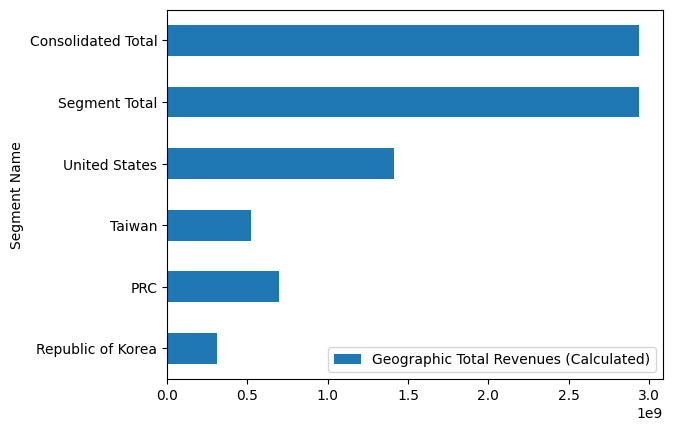

In [67]:
fig = plt.figure()
df.plot(kind='barh', ax=fig.gca())
plt.show()

So we need to restructure the Dataframe and make data easier to read before plotting a graph.

The first step is to reindex from *Segment Name* to be a data column.

In [69]:
df_graph = df.copy()

df_graph.reset_index(level=0, inplace=True)

df_graph

,Segment Name,Instrument,Geographic Total Revenues (Calculated),Company Name
0,Republic of Korea,ARM.O,308000000,Arm Holdings PLC
1,PRC,ARM.O,697000000,
2,Taiwan,ARM.O,522000000,
3,United States,ARM.O,1413000000,
4,Segment Total,ARM.O,2940000000,
5,Consolidated Total,ARM.O,2940000000,


The second step is to  rename *Segment Name* and *Geographic Total Revenues (Calculated)* columns to be more readable names like *Geographic* and *Revenue*.

In [70]:
df_graph.rename(
    columns= {
        'Segment Name':'Geographic',
        'Geographic Total Revenues (Calculated)':'Revenues'
    },
    inplace= True
)

df_graph

,Geographic,Instrument,Revenues,Company Name
0,Republic of Korea,ARM.O,308000000,Arm Holdings PLC
1,PRC,ARM.O,697000000,
2,Taiwan,ARM.O,522000000,
3,United States,ARM.O,1413000000,
4,Segment Total,ARM.O,2940000000,
5,Consolidated Total,ARM.O,2940000000,


The returned Dataframe object from ```get_data``` method contains the summary revenue sale values in Segment's *Segment Total* and *Consolidated Total* rows.

We will use the *Consolidated Total* information as a summary sale value in this notebook. We get this sale from the last row of Dataframe.

In [71]:
total_sale = df_graph.iloc[df_graph.shape[0] - 1]['Revenues']
total_sale

2940000000

Next, get the company name information from the first row of Dataframe object which is the only row that contains *Company Name* column data.

In [72]:
company_name = df_graph.iloc[0]['Company Name']
company_name

'Arm Holdings PLC'

And the last thing on this phase is to remove the Total Sale Revenue rows from the Dataframe, I will display the consolidated revenue information as a graph footer instead.

In [73]:
df_graph = df_graph[df_graph['Geographic'] != 'Segment Total']

df_graph = df_graph[df_graph['Geographic'] != 'Consolidated Total']


Then we define a function for formatting sale number values. The function receives incoming large revenue numbers from Notebook, then reformats that value into a readable numbers in trillions, billions or millions unit.

This code is based on [Dan Friedman](https://github.com/frieds/frieds.github.io)'s [How to Format Large Tick Values tutorial](https://github.com/frieds/frieds.github.io/tree/master/data-visualizations/how_to_format_large_tick_values_files) source code via GitHub.

In [74]:
def format_revenues_number(tick_val, pos):
    """
    Turns large tick values (in the trillions, billions, millions and thousands) such as 4500 into 4.5K 
    and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000000: # Add support for trillions
        val = round(tick_val/1000000000000, 1)
        new_tick_format = '{:}T'.format(val)
    elif tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

     # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    """
    code below will keep 4.5M as is but change values such as 4.0M to 4M since that 
    zero after the decimal isn't needed
    """
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

To plot a graph, I use [matplotlib.pyplot](https://matplotlib.org/api/pyplot_api.html) library to plot a bar graph that represent each region revenue from restructured Dataframe object in Jupyter Notebook.

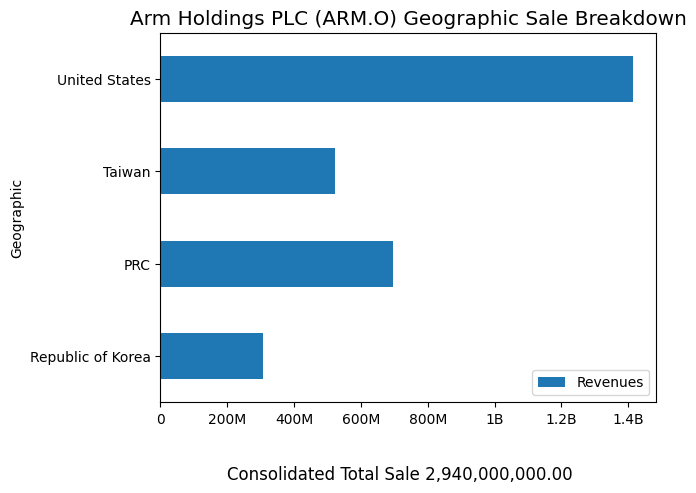

In [75]:
# Plotting a Graph

df_graph.set_index('Geographic',drop=True,inplace=True)
fig = plt.figure()

#Format Total Sale display unit as a graph footer.
fig.text(.5, -.05, 'Consolidated Total Sale %s' %(f'{total_sale:,.2f}'), ha='center',fontsize='large')

# Create graph title from Company and RIC names dynamically.
plt.ticklabel_format(style = 'plain')
plt.title('%s (%s) Geographic Sale Breakdown' % (company_name, ric), color='black',fontsize='x-large')
ax = fig.gca()

#Apply Sale data into millions function.
formatter = FuncFormatter(format_revenues_number)
ax.xaxis.set_major_formatter(formatter)

df_graph.plot(kind='barh', ax = fig.gca())
plt.show()

Note: You can adjust a graph size to match your preference and data via a ```figsize``` parameter of [Dataframe.plot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) method.

## <a id="summary"></a>Conclusion

LSEG provides a wide range of Reuters Fundamentals data for your investment decisions including company geographic sale information via Workspace platform. This information helps you analysis the revenue from each geographic region of your interested company in both panel data and graph formats.

## <a id="references"></a>References

You can find more detail regarding the Data Library and related technologies for this Notebook from the following resources:

- [LSEG Data Library for Python](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python) on the [LSEG Developer Community](https://developers.lseg.com/)
- [Data Library for Python - Reference Guide](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python/documentation#reference-guide)
- [The Data Library for Python  - Quick Reference Guide (Access layer)](https://developers.lseg.com/en/article-catalog/article/the-data-library-for-python-quick-reference-guide-access-layer) article.
- [Essential Guide to the Data Libraries - Generations of Python library (EDAPI, RDP, RD, LD)](https://developers.lseg.com/en/article-catalog/article/essential-guide-to-the-data-libraries) article.
- [Upgrade from using Eikon Data API to the Data library](https://developers.lseg.com/en/article-catalog/article/Upgrade-from-using-Eikon-Data-API-to-the-Data-library) article.
- [Data Library for Python Examples on GitHub](https://github.com/LSEG-API-Samples/Example.DataLibrary.Python) repository.
- [Dan Friedman's Python programming, data analysis, data visualizations tutorials](https://github.com/frieds/frieds.github.io).
- [Pandas API Reference](https://pandas.pydata.org/docs/reference/index.html).
- [Pyplot Graph API Reference](https://matplotlib.org/api/pyplot_api.html).

For any question related to this example or Data Library, please use the Developers Community [Q&A Forum](https://community.developers.refinitiv.com).